# Worldwide Gross Models


## Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge, BayesianRidge
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from sklearn.pipeline import make_pipeline
from joblib import dump, load

## Getting the data


In [2]:
df_movies = pd.read_csv('../data/processed/pixar_movies_complete.csv')
df_movies

Year Released                Movie  Length  RT Score  IMDB Score  \
0            1995            Toy Story      81       100         8.3   
1            1998         A Bug's Life      96        92         7.2   
2            1999          Toy Story 2      92       100         7.9   
3            2001       Monsters, Inc.      90        96         8.1   
4            2003         Finding Nemo     104        99         8.2   
5            2004      The Incredibles     115        97         8.0   
6            2006                 Cars     116        74         7.2   
7            2007          Ratatouille     111        96         8.0   
8            2008               WALL-E      97        96         8.4   
9            2009                   Up      96        98         8.3   
10           2010          Toy Story 3     103        99         8.4   
11           2011               Cars 2     113        39         6.3   
12           2012                Brave     100        78         7.2   
13           2013  Monsters University     107        78         7.4   
14           2015           Inside Out      95        98         8.1   
15           2015    The Good Dinosaur      93        75         6.7   
16           2016         Finding Dory      97        94         7.3   
17           2017               Cars 3     102        68         6.7   
18           2017                 Coco     105        97         8.4   
19           2018        Incredibles 2     118        93         7.6   
20           2019          Toy Story 4     100        97         7.7   
21           2020               Onward     102        89         7.4   
22           2020                 Soul     100        95         8.0   
23           2021                 Luca      95        91         7.4   
24           2022          Turning Red     100        95         7.0   
25           2022            Lightyear     105        74         6.1   

    Metacritic Score  Opening Weekend  Worldwide Gross  Domestic Gross  \
0                 92            29.14           362.00          191.80   
1                 77            33.26           363.40          162.80   
2                 88            57.39           485.00          245.90   
3                 78            62.58           528.80          255.90   
4                 90            70.25           895.60          339.70   
5                 90            70.47           631.40          261.40   
6                 73            60.12           462.00          244.10   
7                 96            47.00           623.70          206.40   
8                 94            63.10           521.30          223.80   
9                 88            68.11           731.30          293.00   
10                92           110.31          1063.20          415.00   
11                57           109.00           559.90          191.50   
12                69            66.30           539.00          237.30   
13                65            82.43           743.60          268.50   
14                94            90.44           858.85          356.92   
15                66            39.15           332.21          123.09   
16                77           135.06          1029.27          486.30   
17                59            53.69           383.93          152.90   
18                81            50.80           814.34          210.46   
19                80           182.69          1243.22          608.58   
20                84           120.91          1073.84          434.04   
21                61            39.12           141.94           61.56   
22                83             0.00           121.03            0.00   
23                71             0.00            49.75            0.00   
24                83             0.00            20.12            0.00   
25                60            50.58           226.42          118.31   

    International Gross  Domestic %  International %  Produc

## Droping columns


In [3]:
df_movies_numeric = df_movies.drop(['Domestic Gross', 'International Gross', 'Domestic %', 'International %', 'Oscars Nominated', 'Oscars Won', 'Movie'], axis=1)
df_movies_numeric

Year Released  Length  RT Score  IMDB Score  Metacritic Score  \
0            1995      81       100         8.3                92   
1            1998      96        92         7.2                77   
2            1999      92       100         7.9                88   
3            2001      90        96         8.1                78   
4            2003     104        99         8.2                90   
5            2004     115        97         8.0                90   
6            2006     116        74         7.2                73   
7            2007     111        96         8.0                96   
8            2008      97        96         8.4                94   
9            2009      96        98         8.3                88   
10           2010     103        99         8.4                92   
11           2011     113        39         6.3                57   
12           2012     100        78         7.2                69   
13           2013     107        78         7.4                65   
14           2015      95        98         8.1                94   
15           2015      93        75         6.7                66   
16           2016      97        94         7.3                77   
17           2017     102        68         6.7                59   
18           2017     105        97         8.4                81   
19           2018     118        93         7.6                80   
20           2019     100        97         7.7                84   
21           2020     102        89         7.4                61   
22           2020     100        95         8.0                83   
23           2021      95        91         7.4                71   
24           2022     100        95         7.0                83   
25           2022     105        74         6.1                60   

    Opening Weekend  Worldwide Gross  Production Budget  
0             29.14           362.00                 30  
1             33.26           363.40                 45  
2             57.39           485.00                 90  
3             62.58           528.80                115  
4             70.25           895.60                 94  
5             70.47           631.40                 92  
6             60.12           462.00                 70  
7             47.00           623.70                150  
8             63.10           521.30                180  
9             68.11           731.30                175  
10           110.31          1063.20                200  
11           109.00           559.90                200  
12            66.30           539.00                185  
13            82.43           743.60                200  
14            90.44           858.85                175  
15            39.15           332.21                200  
16           135.06          1029.27                200  
17            53.69           383.93                175  
18            50.80           814.34                175  
19           182.69          1243.22                200  
20           120.91          1073.84                200  
21            39.12           141.94                175  
22             0.00           121.03                150  
23             0.00            49.75                200  
24             0.00            20.12                175  
25            50.58           226.42                200

## Standardizing Data


In [4]:
movies = df_movies_numeric.values

sc = StandardScaler()
movies_scaled = sc.fit_transform(movies)

df_movies_scaled = pd.DataFrame(movies_scaled, columns=df_movies_numeric.columns)
df_movies_scaled

Year Released    Length  RT Score  IMDB Score  Metacritic Score  \
0       -2.110039 -2.397015  0.818367    1.096596          1.111414   
1       -1.725499 -0.623133  0.235421   -0.598682         -0.148619   
2       -1.597319 -1.096168  0.818367    0.480131          0.775405   
3       -1.340959 -1.332686  0.526894    0.788364         -0.064617   
4       -1.084600  0.322938  0.745499    0.942480          0.943409   
5       -0.956420  1.623784  0.599762    0.634247          0.943409   
6       -0.700060  1.742043 -1.076209   -0.598682         -0.484628   
7       -0.571880  1.150749  0.526894    0.634247          1.447422   
8       -0.443700 -0.504874  0.526894    1.250712          1.279418   
9       -0.315520 -0.623133  0.672631    1.096596          0.775405   
10      -0.187340  0.204679  0.745499    1.250712          1.111414   
11      -0.059160  1.387267 -3.626600   -1.985728         -1.828663   
12       0.069020 -0.150098 -0.784736   -0.598682         -0.820637   
13       0.197200  0.677714 -0.784736   -0.290450         -1.156645   
14       0.453560 -0.741392  0.672631    0.788364          1.279418   
15       0.453560 -0.977909 -1.003341   -1.369263         -1.072643   
16       0.581740 -0.504874  0.381157   -0.444566         -0.148619   
17       0.709920  0.086420 -1.513419   -1.369263         -1.660659   
18       0.709920  0.441196  0.599762    1.250712          0.187389   
19       0.838100  1.978561  0.308289    0.017783          0.103387   
20       0.966280 -0.150098  0.599762    0.171899          0.439396   
21       1.094460  0.086420  0.016816   -0.290450         -1.492654   
22       1.094460 -0.150098  0.454026    0.634247          0.355394   
23       1.222640 -0.741392  0.162552   -0.290450         -0.652632   
24       1.350819 -0.150098  0.454026   -0.906915          0.355394   
25       1.350819  0.441196 -1.076209   -2.293960         -1.576656   

    Opening Weekend  Worldwide Gross  Production Budget  
0         -0.871969        -0.637778          -2.413481  
1         -0.771991        -0.633473          -2.125722  
2         -0.186441        -0.259590          -1.262447  
3         -0.060498        -0.124918          -0.782850  
4          0.125626         1.002881          -1.185712  
5          0.130964         0.190546          -1.224080  
6         -0.120194        -0.330308          -1.646125  
7         -0.438570         0.166871          -0.111414  
8         -0.047880        -0.147978           0.464103  
9          0.073695         0.497708           0.368183  
10         1.097740         1.518201           0.847780  
11         1.065951        -0.029295           0.847780  
12         0.029773        -0.093556           0.560022  
13         0.421191         0.535527           0.847780  
14         0.615565         0.889886           0.368183  
15        -0.629061        -0.729373           0.847780  
16         1.698335         1.413876           0.847780  
17        -0.276227        -0.570349           0.368183  
18        -0.346357         0.753031           0.368183  
19         2.854147         2.071708           0.847780  
20         1.354965         1.550916           0.847780  
21        -0.629789        -1.314396           0.368183  
22        -1.579093        -1.378688          -0.111414  
23        -1.579093        -1.597852           0.847780  
24        -1.579093        -1.688955           0.368183  
25        -0.351696        -1.054645           0.847780

In [5]:
sc_y = StandardScaler().fit(df_movies_numeric['Worldwide Gross'].values.reshape(-1,1))

## Feature engineering


### Adding the pandemic movie category


In [6]:
df_movies_scaled['Pandemic Movies'] = (df_movies['Worldwide Gross'] < 200).astype(int)
df_movies_scaled

Year Released    Length  RT Score  IMDB Score  Metacritic Score  \
0       -2.110039 -2.397015  0.818367    1.096596          1.111414   
1       -1.725499 -0.623133  0.235421   -0.598682         -0.148619   
2       -1.597319 -1.096168  0.818367    0.480131          0.775405   
3       -1.340959 -1.332686  0.526894    0.788364         -0.064617   
4       -1.084600  0.322938  0.745499    0.942480          0.943409   
5       -0.956420  1.623784  0.599762    0.634247          0.943409   
6       -0.700060  1.742043 -1.076209   -0.598682         -0.484628   
7       -0.571880  1.150749  0.526894    0.634247          1.447422   
8       -0.443700 -0.504874  0.526894    1.250712          1.279418   
9       -0.315520 -0.623133  0.672631    1.096596          0.775405   
10      -0.187340  0.204679  0.745499    1.250712          1.111414   
11      -0.059160  1.387267 -3.626600   -1.985728         -1.828663   
12       0.069020 -0.150098 -0.784736   -0.598682         -0.820637   
13       0.197200  0.677714 -0.784736   -0.290450         -1.156645   
14       0.453560 -0.741392  0.672631    0.788364          1.279418   
15       0.453560 -0.977909 -1.003341   -1.369263         -1.072643   
16       0.581740 -0.504874  0.381157   -0.444566         -0.148619   
17       0.709920  0.086420 -1.513419   -1.369263         -1.660659   
18       0.709920  0.441196  0.599762    1.250712          0.187389   
19       0.838100  1.978561  0.308289    0.017783          0.103387   
20       0.966280 -0.150098  0.599762    0.171899          0.439396   
21       1.094460  0.086420  0.016816   -0.290450         -1.492654   
22       1.094460 -0.150098  0.454026    0.634247          0.355394   
23       1.222640 -0.741392  0.162552   -0.290450         -0.652632   
24       1.350819 -0.150098  0.454026   -0.906915          0.355394   
25       1.350819  0.441196 -1.076209   -2.293960         -1.576656   

    Opening Weekend  Worldwide Gross  Production Budget  Pandemic Movies  
0         -0.871969        -0.637778          -2.413481                0  
1         -0.771991        -0.633473          -2.125722                0  
2         -0.186441        -0.259590          -1.262447                0  
3         -0.060498        -0.124918          -0.782850                0  
4          0.125626         1.002881          -1.185712                0  
5          0.130964         0.190546          -1.224080                0  
6         -0.120194        -0.330308          -1.646125                0  
7         -0.438570         0.166871          -0.111414                0  
8         -0.047880        -0.147978           0.464103                0  
9          0.073695         0.497708           0.368183                0  
10         1.097740         1.518201           0.847780                0  
11         1.065951        -0.029295           0.847780                0  
12         0.029773        -0.093556           0.560022                0  
13         0.421191         0.535527           0.847780                0  
14         0.615565         0.889886           0.368183                0  
15        -0.629061        -0.729373           0.847780                0  
16         1.698335         1.413876           0.847780                0  
17        -0.276227        -0.570349           0.368183                0  
18        -0.346357         0.753031           0.368183                0  
19         2.854147         2.071708           0.847780                0  
20         1.354965         1.550916           0.847780                0  
21        -0.629789        -1.314396           0.368183                1  
22        -1.579093        -1.378688          -0.111414                1  
23        -1.579093        -1.597852           0.847780                1  
24        -1.579093        -1.688955           0.368183                1  
25        -0.351696        -1.054645           0.847780                0

### Adding the Sequel Movie category


In [7]:
is_sequel = []
for movie in df_movies['Movie']:
  if any(c.isdigit() for c in movie) or 'Dory' in movie:
    is_sequel.append(1)
  else:
    is_sequel.append(0)

is_sequel

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]

In [8]:
df_movies_scaled['Sequel Movie'] = is_sequel
df_movies_scaled

Year Released    Length  RT Score  IMDB Score  Metacritic Score  \
0       -2.110039 -2.397015  0.818367    1.096596          1.111414   
1       -1.725499 -0.623133  0.235421   -0.598682         -0.148619   
2       -1.597319 -1.096168  0.818367    0.480131          0.775405   
3       -1.340959 -1.332686  0.526894    0.788364         -0.064617   
4       -1.084600  0.322938  0.745499    0.942480          0.943409   
5       -0.956420  1.623784  0.599762    0.634247          0.943409   
6       -0.700060  1.742043 -1.076209   -0.598682         -0.484628   
7       -0.571880  1.150749  0.526894    0.634247          1.447422   
8       -0.443700 -0.504874  0.526894    1.250712          1.279418   
9       -0.315520 -0.623133  0.672631    1.096596          0.775405   
10      -0.187340  0.204679  0.745499    1.250712          1.111414   
11      -0.059160  1.387267 -3.626600   -1.985728         -1.828663   
12       0.069020 -0.150098 -0.784736   -0.598682         -0.820637   
13       0.197200  0.677714 -0.784736   -0.290450         -1.156645   
14       0.453560 -0.741392  0.672631    0.788364          1.279418   
15       0.453560 -0.977909 -1.003341   -1.369263         -1.072643   
16       0.581740 -0.504874  0.381157   -0.444566         -0.148619   
17       0.709920  0.086420 -1.513419   -1.369263         -1.660659   
18       0.709920  0.441196  0.599762    1.250712          0.187389   
19       0.838100  1.978561  0.308289    0.017783          0.103387   
20       0.966280 -0.150098  0.599762    0.171899          0.439396   
21       1.094460  0.086420  0.016816   -0.290450         -1.492654   
22       1.094460 -0.150098  0.454026    0.634247          0.355394   
23       1.222640 -0.741392  0.162552   -0.290450         -0.652632   
24       1.350819 -0.150098  0.454026   -0.906915          0.355394   
25       1.350819  0.441196 -1.076209   -2.293960         -1.576656   

    Opening Weekend  Worldwide Gross  Production Budget  Pandemic Movies  \
0         -0.871969        -0.637778          -2.413481                0   
1         -0.771991        -0.633473          -2.125722                0   
2         -0.186441        -0.259590          -1.262447                0   
3         -0.060498        -0.124918          -0.782850                0   
4          0.125626         1.002881          -1.185712                0   
5          0.130964         0.190546          -1.224080                0   
6         -0.120194        -0.330308          -1.646125                0   
7         -0.438570         0.166871          -0.111414                0   
8         -0.047880        -0.147978           0.464103                0   
9          0.073695         0.497708           0.368183                0   
10         1.097740         1.518201           0.847780                0   
11         1.065951        -0.029295           0.847780                0   
12         0.029773        -0.093556           0.560022                0   
13         0.421191         0.535527           0.847780                0   
14         0.615565         0.889886           0.368183                0   
15        -0.629061        -0.729373           0.847780                0   
16         1.698335         1.413876           0.847780                0   
17        -0.276227        -0.570349           0.368183                0   
18        -0.346357         0.753031           0.368183                0   
19         2.854147         2.071708           0.847780                0   
20         1.354965         1.550916           0.847780                0   
21        -0.629789        -1.314396           0.368183                1   
22        -1.579093        -1.378688          -0.111414                1   
23        -1.579093        -1.597852           0.847780                1   
24        -1.579093        -1.688955           0.368183                1   
25        -0.351696        -1.054645           0.847780                0   

    Sequel Movie  
0             

## Applying PCA


In [9]:
df_movies_pca = df_movies_scaled.drop('Worldwide Gross', axis=1)
df_movies_pca

Year Released    Length  RT Score  IMDB Score  Metacritic Score  \
0       -2.110039 -2.397015  0.818367    1.096596          1.111414   
1       -1.725499 -0.623133  0.235421   -0.598682         -0.148619   
2       -1.597319 -1.096168  0.818367    0.480131          0.775405   
3       -1.340959 -1.332686  0.526894    0.788364         -0.064617   
4       -1.084600  0.322938  0.745499    0.942480          0.943409   
5       -0.956420  1.623784  0.599762    0.634247          0.943409   
6       -0.700060  1.742043 -1.076209   -0.598682         -0.484628   
7       -0.571880  1.150749  0.526894    0.634247          1.447422   
8       -0.443700 -0.504874  0.526894    1.250712          1.279418   
9       -0.315520 -0.623133  0.672631    1.096596          0.775405   
10      -0.187340  0.204679  0.745499    1.250712          1.111414   
11      -0.059160  1.387267 -3.626600   -1.985728         -1.828663   
12       0.069020 -0.150098 -0.784736   -0.598682         -0.820637   
13       0.197200  0.677714 -0.784736   -0.290450         -1.156645   
14       0.453560 -0.741392  0.672631    0.788364          1.279418   
15       0.453560 -0.977909 -1.003341   -1.369263         -1.072643   
16       0.581740 -0.504874  0.381157   -0.444566         -0.148619   
17       0.709920  0.086420 -1.513419   -1.369263         -1.660659   
18       0.709920  0.441196  0.599762    1.250712          0.187389   
19       0.838100  1.978561  0.308289    0.017783          0.103387   
20       0.966280 -0.150098  0.599762    0.171899          0.439396   
21       1.094460  0.086420  0.016816   -0.290450         -1.492654   
22       1.094460 -0.150098  0.454026    0.634247          0.355394   
23       1.222640 -0.741392  0.162552   -0.290450         -0.652632   
24       1.350819 -0.150098  0.454026   -0.906915          0.355394   
25       1.350819  0.441196 -1.076209   -2.293960         -1.576656   

    Opening Weekend  Production Budget  Pandemic Movies  Sequel Movie  
0         -0.871969          -2.413481                0             0  
1         -0.771991          -2.125722                0             0  
2         -0.186441          -1.262447                0             1  
3         -0.060498          -0.782850                0             0  
4          0.125626          -1.185712                0             0  
5          0.130964          -1.224080                0             0  
6         -0.120194          -1.646125                0             0  
7         -0.438570          -0.111414                0             0  
8         -0.047880           0.464103                0             0  
9          0.073695           0.368183                0             0  
10         1.097740           0.847780                0             1  
11         1.065951           0.847780                0             1  
12         0.029773           0.560022                0             0  
13         0.421191           0.847780                0             0  
14         0.615565           0.368183                0             0  
15        -0.629061           0.847780                0             0  
16         1.698335           0.847780                0             1  
17        -0.276227           0.368183                0             1  
18        -0.346357           0.368183                0             0  
19         2.854147           0.847780                0             1  
20         1.354965           0.847780                0             1  
21        -0.629789           0.368183                1             0  
22        -1.579093          -0.111414                1             0  
23        -1.579093           0.847780                1             0  
24        -1.579093           0.368183                1             0  
25        -0.351696           0.847780                0             0

In [10]:
pca = PCA()
pca.fit_transform(df_movies_pca)
pca_movie_scaled = pca.transform(df_movies_pca)

In [11]:
var = pca.explained_variance_ratio_
var

array([0.45074418, 0.21175601, 0.16992099, 0.089749  , 0.03114844,
       0.02124516, 0.01374306, 0.00732185, 0.00437133])

[45.07 66.25 83.24 92.21 95.32 97.44 98.81 99.54 99.98]


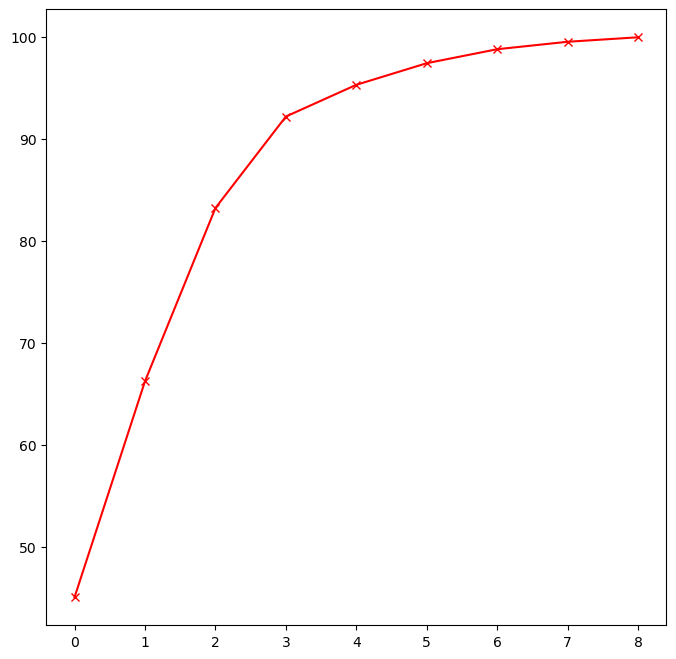

In [12]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(8,8))
plt.plot(cum_var, 'r-x');
print(cum_var)

In [13]:
pca_movie_scaled = pd.DataFrame(pca_movie_scaled)
pca_movie_scaled.drop([4,5,6,7,8], axis=1, inplace=True)

## Functions


In [65]:
def loo_cv(X, y, model):
  loo = LeaveOneOut()
  y_true, y_pred = [], []

  for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test.iloc[0])
    
  # y_true_unsc = sc_y.inverse_transform(np.array(y_true).reshape(-1,1))
  # y_pred_unsc = sc_y.inverse_transform(np.array(y_pred).reshape(-1,1))  
  return y_true, y_pred

In [70]:
def inverse_y(y_true, y_pred):
  return sc_y.inverse_transform(np.array(y_true).reshape(-1,1)), sc_y.inverse_transform(np.array(y_pred).reshape(-1,1))

## Linear Regression


### Scaled Data

In [61]:
X = df_movies_scaled.drop('Worldwide Gross', axis=1)
y = df_movies_scaled['Worldwide Gross']

In [16]:
param_grid = {
  'fit_intercept': [True, False]
}
linear_pca_model = LinearRegression()
grid_linear_pca = GridSearchCV(linear_pca_model, param_grid, n_jobs=-1, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
grid_linear_pca.fit(X, y)
print(grid_linear_pca.best_params_)

{'fit_intercept': True}


In [62]:
model = LinearRegression(fit_intercept=True)

selector = RFECV(model, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
selector.fit(X,y)
print(selector.ranking_)

[1 4 2 1 6 1 5 1 3]


In [71]:
X = df_movies_scaled[['Year Released','IMDB Score', 'Opening Weekend', 'Pandemic Movies']]

y_true, y_pred = loo_cv(X, y, model)
y_true, y_pred = inverse_y(y_true, y_pred)

print('MAE:', mean_absolute_error(y_true, y_pred))
print('r2:', r2_score(y_true, y_pred))

MAE: 77.95260268170608
r2: 0.9081501060668848


### PCA

In [19]:
X = pca_movie_scaled
y = df_movies_scaled['Worldwide Gross']

In [20]:
y_true, y_pred = loo_cv(X, y, model)

print('MAE:', mean_absolute_error(y_true, y_pred))
print('r2:', r2_score(y_true, y_pred))

MAE: 96.6685547228984
r2: 0.8649999739348078


## Lasso Model

In [72]:
X = df_movies_scaled[['Year Released', 'IMDB Score', 'Opening Weekend', 'Pandemic Movies']]
y = df_movies_scaled['Worldwide Gross']

In [22]:
param_grid = {
  'alpha': np.arange(0.01, 1, 0.01),
  'fit_intercept': [True, False]
}
model = Lasso()
grid_lasso = GridSearchCV(model, param_grid, n_jobs=-1, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
grid_lasso.fit(X,y)
grid_lasso.best_params_

{'alpha': 0.01, 'fit_intercept': True}

In [73]:
model = Lasso(alpha=0.01, fit_intercept=True)

selector = RFECV(model, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
selector.fit(X,y)
print(selector.ranking_)

[1 1 1 1]


In [74]:
# X = df_movies_scaled[['Year Released', 'RT Score','IMDB Score', 'Opening Weekend', 'Pandemic Movies']]

y_true, y_pred = loo_cv(X, y, model)
y_true, y_pred = inverse_y(y_true, y_pred)

print('MAE:', mean_absolute_error(y_true, y_pred))
print('r2:', r2_score(y_true, y_pred))

MAE: 81.22611663004416
r2: 0.9017863762989347


## Ridge Model

In [25]:
X = df_movies_scaled.drop('Worldwide Gross', axis=1)
y = df_movies_scaled['Worldwide Gross']

In [26]:
param_grid = {
  'alpha': np.arange(0.01, 1, 0.01),
  'fit_intercept': [True, False]
}
model = Ridge()
grid_lasso = GridSearchCV(model, param_grid, n_jobs=-1, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
grid_lasso.fit(X,y)
grid_lasso.best_params_

{'alpha': 0.5700000000000001, 'fit_intercept': True}

In [27]:
model = Ridge(alpha=0.99, fit_intercept=False)

selector = RFECV(model, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
selector.fit(X,y)
print(selector.ranking_)

[7 4 2 1 6 1 5 1 3]


In [28]:
X = df_movies_scaled[['IMDB Score', 'Opening Weekend', 'Pandemic Movies']]

y_true, y_pred = loo_cv(X, y, model)
y_true, y_pred = inverse_y(y_true, y_pred)

print('MAE:', mean_absolute_error(y_true, y_pred))
print('r2:', r2_score(y_true, y_pred))

MAE: 85.24746229718055
r2: 0.8993313664258216


## ElasticNet Model

In [29]:
X = df_movies_scaled[['Year Released', 'IMDB Score', 'Opening Weekend', 'Pandemic Movies']]
y = df_movies_scaled['Worldwide Gross']

In [30]:
# param_grid = {
#   'alpha': np.arange(0.01, 1, 0.01),
#   'l1_ratio': np.arange(0.01, 1, 0.01),
#   'fit_intercept': [True, False]
# }
# model = ElasticNet()
# grid_ridge = GridSearchCV(model, param_grid, n_jobs=-1, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
# grid_ridge.fit(X,y)
# grid_ridge.best_params_

In [31]:
model = ElasticNet(alpha=0.01, fit_intercept=True, l1_ratio=0.01)

selector = RFECV(model, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
selector.fit(X,y)
print(selector.ranking_)

[1 1 1 1]


In [32]:
# X = df_movies_scaled[['IMDB Score', 'Opening Weekend', 'Pandemic Movies']]

y_true, y_pred = loo_cv(X, y, model)
y_true, y_pred = inverse_y(y_true, y_pred)

print('MAE:', mean_absolute_error(y_true, y_pred))
print('r2:', r2_score(y_true, y_pred))

MAE: 78.35471272146235
r2: 0.908150869976811


## BayesianRidge Model

In [33]:
X = df_movies_scaled[['Year Released', 'IMDB Score', 'Opening Weekend', 'Pandemic Movies']]
y = df_movies_scaled['Worldwide Gross']

In [34]:
model = BayesianRidge(fit_intercept=True)

selector = RFECV(model, cv=LeaveOneOut(), scoring='neg_mean_absolute_error', n_jobs=-1)
selector.fit(X,y)
print(selector.ranking_)

[1 1 1 1]


In [35]:
# X = df_movies_scaled[['IMDB Score', 'Opening Weekend', 'Pandemic Movies']]

y_true, y_pred = loo_cv(X, y, model)
y_true, y_pred = inverse_y(y_true, y_pred)

print('MAE:', mean_absolute_error(y_true, y_pred))
print('r2:', r2_score(y_true, y_pred))

MAE: 78.87313323618324
r2: 0.9067325161065367


## Elemental

In [36]:
sc_x = StandardScaler().fit(df_movies_numeric[['Year Released', 'IMDB Score', 'Opening Weekend']]) 

elemental = [[2023,7.1, 29.6]]
elemental_scaled = sc_x.transform(elemental)

/home/iafs/anaconda3/envs/pixar_movies/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
elemental_scaled = np.append(elemental_scaled[0], 0)

In [38]:
X = df_movies_scaled[['Year Released','IMDB Score', 'Opening Weekend', 'Pandemic Movies']]
y = df_movies_scaled['Worldwide Gross']

model = Ridge(alpha=0.01, fit_intercept=True).fit(X,y)

In [39]:
y_pred = model.predict([elemental_scaled])
y_pred

/home/iafs/anaconda3/envs/pixar_movies/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([-0.472886])

In [40]:
sc_y.inverse_transform([y_pred])[0][0]

415.6285237827316

## Model Export

In [41]:
X = df_movies_scaled[['Year Released','IMDB Score', 'Opening Weekend', 'Pandemic Movies']]
y = df_movies_scaled['Worldwide Gross']

In [42]:
model = make_pipeline(StandardScaler(), Ridge(alpha=0.01)).fit(X,y)

In [43]:
# dump(model, '../models/worldwide_gross.joblib')

In [44]:
model_load = load('../models/worldwide_gross.joblib')
model_load.predict([[2023, 7.1, 29.6, 0]])

/home/iafs/anaconda3/envs/pixar_movies/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([423.81070201])